<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Data exploration process for superStore dataset

by: Reham AlDhari


- Pulling data 
- understad the data set 
- looking at the data types inside each series on the data frame 
- Applying some EDA demonstrations.
- Cleaning the data
- Displaying data in visualizations.


In [63]:
# call libraries to use it for explorining, analyzing, and visualiztion the data 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

# Load the data sets

In [64]:
# Read in the orders from superstore data.
store=pd.read_csv('orders.csv')

# get infomations
store.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999991 entries, 0 to 999990
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   order_id     999991 non-null  object 
 1   order_date   999991 non-null  object 
 2   ship_date    999991 non-null  object 
 3   ship_mode    999991 non-null  object 
 4   customer_id  999991 non-null  object 
 5   product_id   999991 non-null  object 
 6   sales        999991 non-null  float64
 7   quantity     999991 non-null  int64  
 8   discount     999991 non-null  float64
 9   profit       999991 non-null  float64
 10  postal_code  192888 non-null  float64
 11  region_id    999795 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 91.6+ MB


# clean up the data

 Dealing with Missing Values


- I have noticed the missing values in two columns ,'region_id' and 'postal_code'
- the missing values in 'region_id' will be deleted , and 'postal_code' will be replaced 


In [66]:
# create a new dataset to deal with the missing values 
# drop the row that contains missing data in the column 'region_id'
N_df=store.dropna(subset=['region_id'])

In [67]:
N_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999795 entries, 0 to 999990
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   order_id     999795 non-null  object 
 1   order_date   999795 non-null  object 
 2   ship_date    999795 non-null  object 
 3   ship_mode    999795 non-null  object 
 4   customer_id  999795 non-null  object 
 5   product_id   999795 non-null  object 
 6   sales        999795 non-null  float64
 7   quantity     999795 non-null  int64  
 8   discount     999795 non-null  float64
 9   profit       999795 non-null  float64
 10  postal_code  192888 non-null  float64
 11  region_id    999795 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 99.2+ MB


In [68]:
# replace the missing details in the 'postal_code' by 'unknown'
new_store= N_df.fillna('unknown')

# converting data type 

In [69]:
#change the data type for the 'order_date' and 'ship_date' to datetime data type
new_store[['order_date','ship_date']]=new_store[['order_date','ship_date']].apply(pd.to_datetime)

In [70]:
new_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999795 entries, 0 to 999990
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   order_id     999795 non-null  object        
 1   order_date   999795 non-null  datetime64[ns]
 2   ship_date    999795 non-null  datetime64[ns]
 3   ship_mode    999795 non-null  object        
 4   customer_id  999795 non-null  object        
 5   product_id   999795 non-null  object        
 6   sales        999795 non-null  float64       
 7   quantity     999795 non-null  int64         
 8   discount     999795 non-null  float64       
 9   profit       999795 non-null  float64       
 10  postal_code  999795 non-null  object        
 11  region_id    999795 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(1), object(5)
memory usage: 99.2+ MB


In [71]:
# add a new column called 'order year' to visualize it later
new_store['order_year']=new_store['order_date'].dt.year

In [72]:
# create a new column 'days_to_ship' to categorize the shipping speed
new_store['days_to_ship']=((new_store.ship_date)- (new_store.order_date)).dt.days

In [73]:
#check the new column 
new_store.head()

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,postal_code,region_id,order_year,days_to_ship
0,AE-2016-1308551,2016-09-28,2016-10-02,Second Class,PO-8865,OFF-FEL-10001405,82.67,2,0.3,0.3,unknown,9954.0,2016,4
1,AE-2016-1522857,2016-09-04,2016-09-09,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.5,0.5,unknown,4792.0,2016,5
2,AE-2016-184765,2016-10-03,2016-10-07,Second Class,PO-8865,OFF-FEL-10001405,82.67,2,0.3,0.3,unknown,19848.0,2016,4
3,AE-2016-1878215,2016-09-15,2016-09-17,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.5,0.5,unknown,1410.0,2016,2
4,AE-2016-218276,2016-10-09,2016-10-12,Standard Class,PO-8865,TEC-EPS-10004171,78.41,6,0.5,0.5,unknown,1826.0,2016,3


In [78]:
# the average speed of shipping
new_store.days_to_ship.agg(['mean','min','max'])

mean    2.572615
min     0.000000
max     8.000000
Name: days_to_ship, dtype: float64

In [83]:
# create a function for shipping speed category and apply it to the data set
def ship_speed (df,col):
    speed=[]
    for val in df[col]:
        if val < 3:
            speed.append('fast')
        elif val == 3:
            speed.append('average')
        else:
            speed.append('slow')      
    return speed

In [84]:
# create a new column to categorize the shipping speed 
new_store['ship_speed']=ship_speed(new_store,'days_to_ship')

Text(0, 0.5, 'number of shipping')

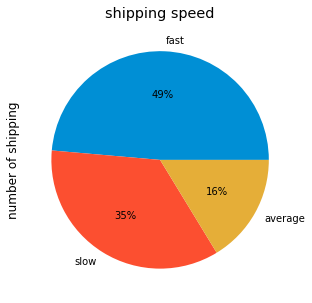

In [147]:
# count values for each category 
new_store['ship_speed'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize =(7,5))
plt.title ('shipping speed')
plt.ylabel('percent number of shipping')

Text(0, 0.5, 'number of shipping')

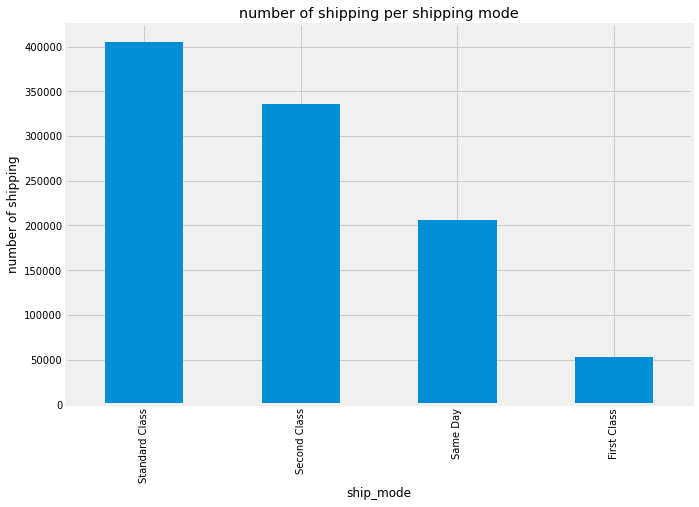

In [140]:
# visualize the number of shipping per shipping mode
new_store['ship_mode'].value_counts().plot(kind= 'bar',figsize =(10,7))
plt.title ('number of shipping per shipping mode')
plt.xlabel('ship_mode')
plt.ylabel('number of shipping')

# thank you 